In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file = '/content/FoodBalanceSheets_E_Africa_NOFLAG.csv'

In [13]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [14]:
data = pd.read_csv(file, encoding='ISO-8859-1')

In [15]:
data

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [20]:
data.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [17]:
data.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [28]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

count    60943.000000
mean       134.265576
std         72.605709
min          4.000000
25%         74.000000
50%        136.000000
75%        195.000000
max        276.000000
Name: Area Code, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


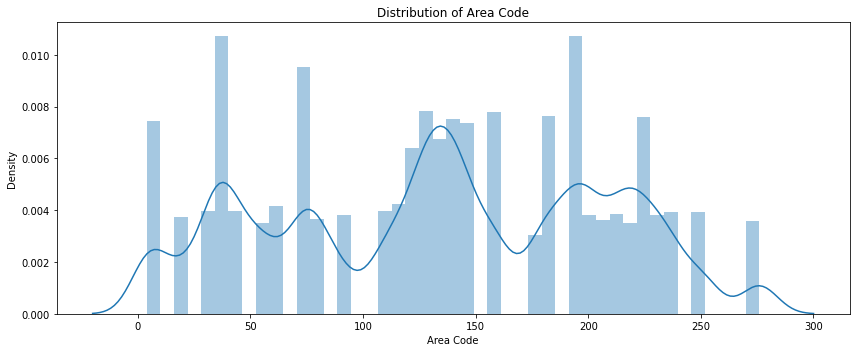

count    60943.000000
mean      2687.176706
std        146.055739
min       2501.000000
25%       2562.000000
50%       2630.000000
75%       2775.000000
max       2961.000000
Name: Item Code, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


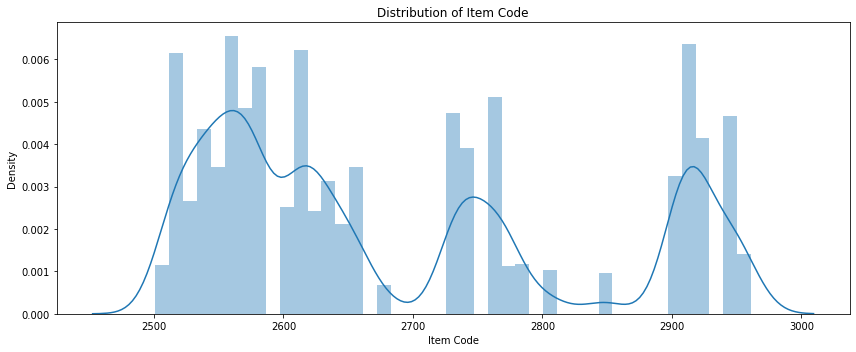

count    60943.000000
mean      3814.856456
std       2212.007033
min        511.000000
25%        684.000000
50%       5142.000000
75%       5511.000000
max       5911.000000
Name: Element Code, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


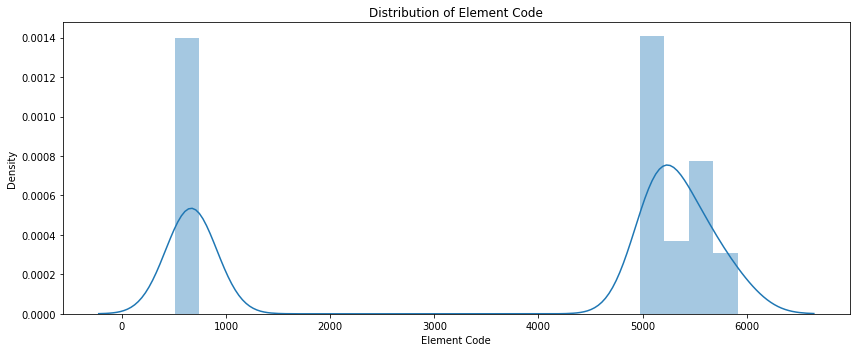

count     59354.000000
mean        134.196282
std        1567.663696
min       -1796.000000
25%           0.000000
50%           0.090000
75%           8.340000
max      176405.000000
Name: Y2014, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


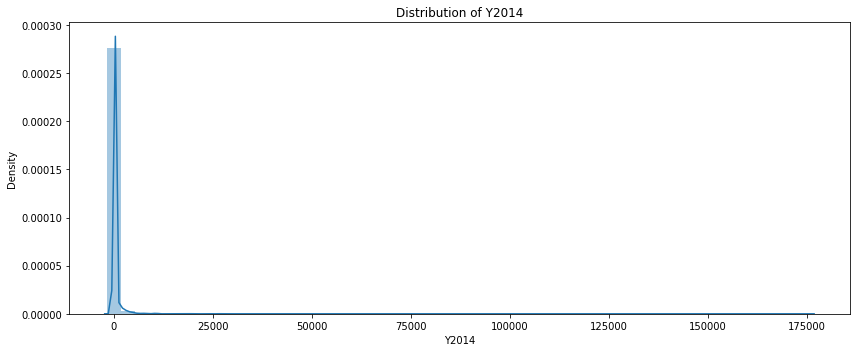

count     59395.000000
mean        135.235966
std        1603.403984
min       -3161.000000
25%           0.000000
50%           0.080000
75%           8.460000
max      181137.000000
Name: Y2015, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


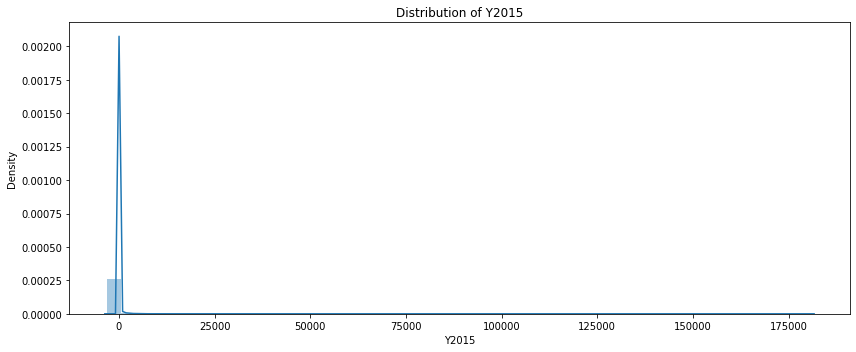

count     59408.000000
mean        136.555222
std        1640.007194
min       -3225.000000
25%           0.000000
50%           0.080000
75%           8.430000
max      185960.000000
Name: Y2016, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


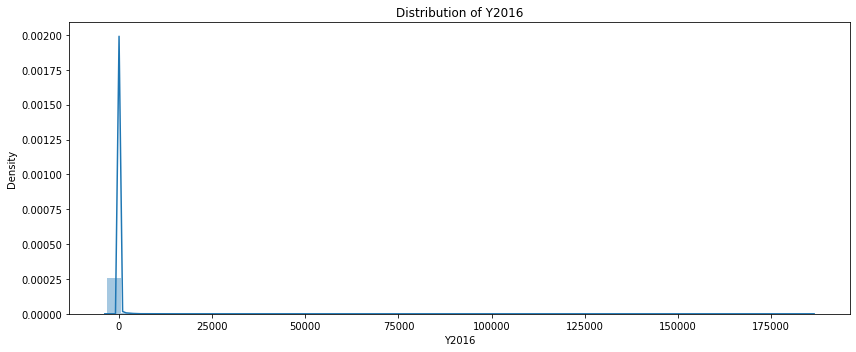

count     59437.000000
mean        140.917765
std        1671.862359
min       -1582.000000
25%           0.000000
50%           0.100000
75%           9.000000
max      190873.000000
Name: Y2017, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


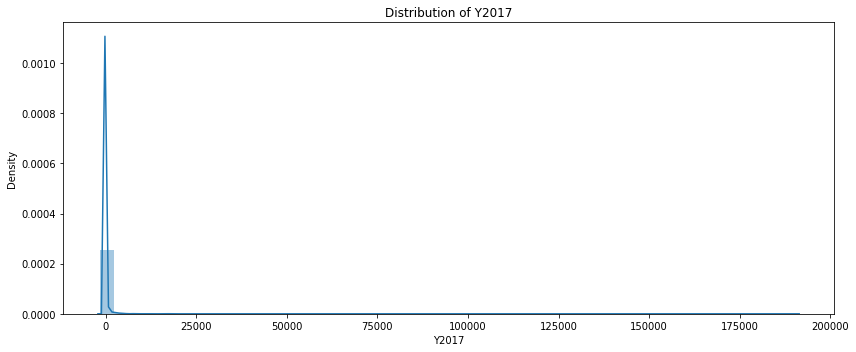

count     59507.000000
mean        143.758381
std        1710.782658
min       -3396.000000
25%           0.000000
50%           0.070000
75%           9.000000
max      195875.000000
Name: Y2018, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


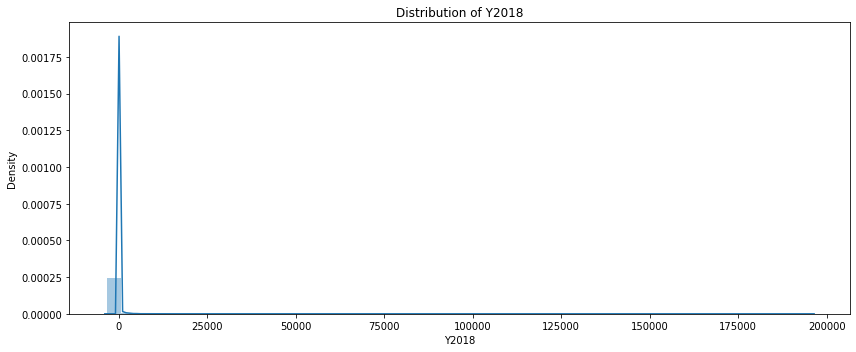

In [34]:
numeric_distribution_plot(data)

In [43]:
data.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


In [44]:
data.groupby('Item')['Y2014','Y2017'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Y2014,Y2017
Item,,
"Alcohol, Non-Food",2403.00,2348.00
Alcoholic Beverages,102410.11,95581.06
Animal Products,11935.65,11547.65
Animal fats,209460.54,269617.53
Apples and products,9499.23,10198.90
...,...,...
"Vegetables, Other",155038.96,157752.59
Vegetal Products,107145.19,107655.20
Wheat and products,232670.13,240047.62


In [45]:
data['Y2015'].mean()

135.23596649549236

In [46]:
data['Y2016'].isnull().sum()

1535

In [47]:
data.groupby('Element')['Y2014','Y2015','Y2016','Y2017','Y2018'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),10225.56,10235.74,10102.77,10253.84,10258.69
Feed,216927.89,225050.22,228958.65,223705.68,233489.68
Food,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,153223.00,155439.00,157787.00,160614.00,163902.00


In [49]:
data.groupby('Element')['Y2018'].sum()

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64

In [53]:
data['Area'].nunique()

49

In [61]:
data.groupby(['Element','Area']).sum()

Area Code  ...     Y2018
Element                  Area                              ...          
Domestic supply quantity Algeria                      464  ...  90023.42
                         Angola                       826  ...  59590.22
                         Benin                       6148  ...  31447.90
                         Botswana                    2340  ...   3045.85
                         Burkina Faso               27494  ...  25705.16
...                                                   ...  ...       ...
Tourist consumption      Cabo Verde                  3150  ...      7.00
                         Egypt                       5546  ...     23.00
                         Kenya                      11172  ...     17.00
                         Mauritius                  12467  ...     31.00
                         Sao Tome and Principe      16019  ...     12.00

[803 rows x 8 columns]